In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
file_path = "./Data_StochasticPayoffs_20240902_0005/"
file_names = os.listdir(file_path)
print(len(file_names))
print(file_names[:3])
print(file_names[-3:])

64
['Result_00_-40.0.csv', 'Result_01_-39.04761904761905.csv', 'Result_02_-38.095238095238095.csv']
['Result_61_18.095238095238095.csv', 'Result_62_19.047619047619044.csv', 'Result_63_20.0.csv']


In [3]:
threshold = float(file_names[-5].split('_')[-1].rstrip(".csv"))
print(threshold)

16.19047619047619


In [4]:
df = pd.read_csv(file_path + file_names[-15], header = 2)
df = df[df.columns[:-1]]
df.index = [(not (i or j)) and (k == 16)
             for i, j, k in zip(df["Hawk_Extincts"], df["Dove_Extincts"], df["Evolution_Rounds"])]
final_hawk_frequency = df["Final_Hawk_Frequency"][df.index].sort_values(ascending = False)
# print(df)
print(final_hawk_frequency, final_hawk_frequency.tolist(), sep = "\n\n")

True    0.437500
True    0.437500
True    0.429688
True    0.429688
True    0.421875
          ...   
True    0.023438
True    0.023438
True    0.015625
True    0.007812
True    0.007812
Name: Final_Hawk_Frequency, Length: 96, dtype: float64

[0.4375, 0.4375, 0.4296875, 0.4296875, 0.421875, 0.421875, 0.421875, 0.421875, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.4140625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.3984375, 0.3984375, 0.3984375, 0.390625, 0.390625, 0.390625, 0.390625, 0.390625, 0.390625, 0.3828125, 0.375, 0.3671875, 0.359375, 0.359375, 0.34375, 0.328125, 0.3125, 0.296875, 0.296875, 0.2890625, 0.2578125, 0.25, 0.25, 0.2421875, 0.2421875, 0.234375, 0.234375, 0.21875, 0.21875, 0.21875, 0.21875, 0.2109375, 0.203125, 0.1953125, 0.1875, 0.171875, 0.171875, 0.1640625, 0.15625, 0.15625, 0.1484375, 0.140625, 0.140625, 0.140625, 0.1328125, 0.1328125, 0.1328125, 0.125, 0.1171875

In [5]:
points:list[tuple] = []

for file_name in file_names:
    threshold = float(file_name.split('_')[-1].rstrip(".csv"))
    df = pd.read_csv(file_path + file_name, header = 2)
    df = df[df.columns[:-1]]
    df.index = [(not (i or j)) and (k == 16)
                for i, j, k in zip(df["Hawk_Extincts"], df["Dove_Extincts"], df["Evolution_Rounds"])]
    final_hawk_frequency = df["Final_Hawk_Frequency"][df.index]
    for i in final_hawk_frequency.tolist(): points.append((threshold, i))

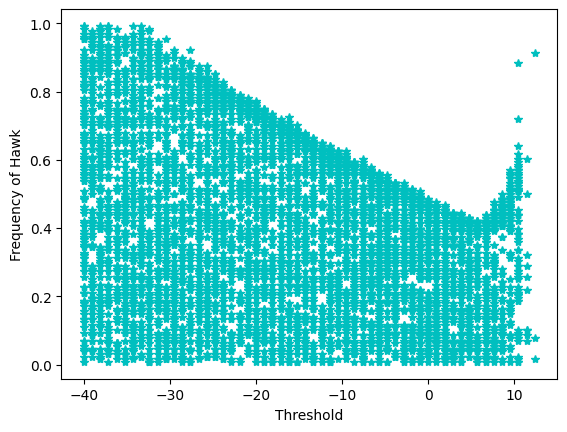

In [6]:
plt.cla()
plt.xlabel("Threshold")
plt.ylabel("Frequency of Hawk")
for point_i in points: plt.plot(point_i[0], point_i[1], "c*")
# plt.savefig("./Plots/StochasticPayoffs_20250830.jpg")
plt.show()